Text(0, 0.5, 'Availability of air conditioning')

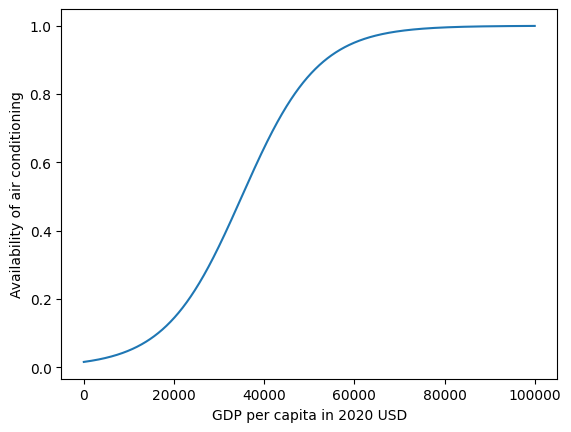

In [3]:
import numpy as np
import matplotlib.pyplot as plt

gdp = np.linspace(0, 100000, 1000)
# Factor 0.5 between 1995 USD and 2020 USD
infl_factor = 0.5

def avail(gdp):
    return (1/(1+np.exp(4.152)*np.exp(-0.237*infl_factor*gdp/1000)))
    

plt.plot(gdp, avail(gdp))
plt.xlabel('GDP per capita in 2020 USD')
plt.ylabel('Availability of air conditioning')

(0.0, 1.0)

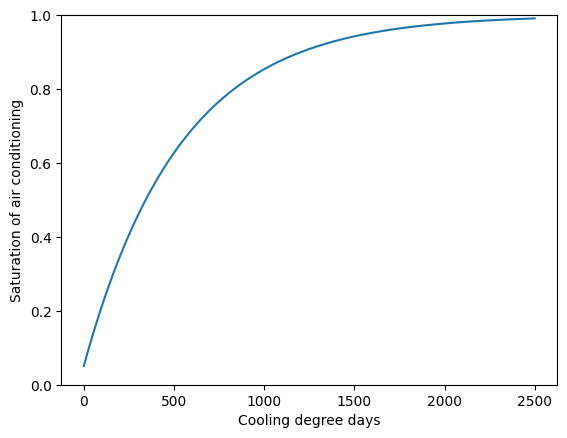

In [4]:
cdd_x = np.linspace(0, 2500, 1000)
def sat(cdd):
    return (1.00 - 0.949*np.exp(-0.00187*cdd))
plt.plot(cdd_x, sat(cdd_x))
plt.xlabel('Cooling degree days')
plt.ylabel('Saturation of air conditioning')
plt.ylim(0, 1.)

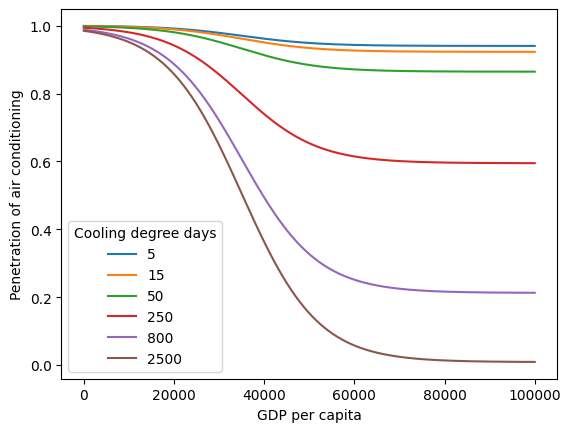

In [5]:
# Show penetration of air conditioning as a function of GDP per capita for different cooling degree days
plt.figure()
def exposure(gdp, cdd):
    return (1 - avail(gdp)*sat(cdd))
for cdd in [5, 15, 50, 250, 800, 2500]:
    plt.plot(gdp, exposure(gdp,cdd), label=str(cdd))
plt.xlabel('GDP per capita')
plt.ylabel('Penetration of air conditioning')
plt.legend(title='Cooling degree days')


Text(10000, 2000, 'exposure(GDP, CDD)')

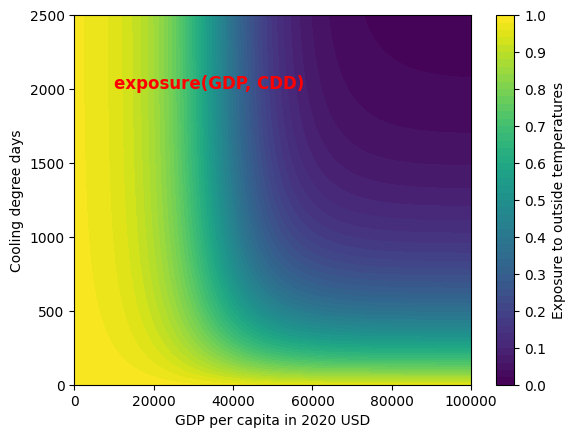

In [6]:
# Make a contour plot of penetration of air conditioning as a function of GDP per capita and cooling degree days
plt.figure()
cdd_x = np.linspace(0, 2500, 100)
gdp_x = np.linspace(0, 100000, 100)
levels = np.linspace(0, 1, 51)
cdd_x, gdp_x = np.meshgrid(cdd_x, gdp_x)
plt.contourf(gdp_x, cdd_x, exposure(gdp_x, cdd_x), levels=levels)
plt.xlabel('GDP per capita in 2020 USD')
plt.ylabel('Cooling degree days')
plt.colorbar(label='Exposure to outside temperatures', ticks=np.linspace(0, 1, 11))
# color bar range is 0 to 1
plt.clim(0, 1.0)
# Add label in red and bold
plt.text(10000, 2000, 'exposure(GDP, CDD)', fontsize=12, color='red', fontweight='bold')

Text(0.2, 2000, 'GDP(exposure, CDD)')

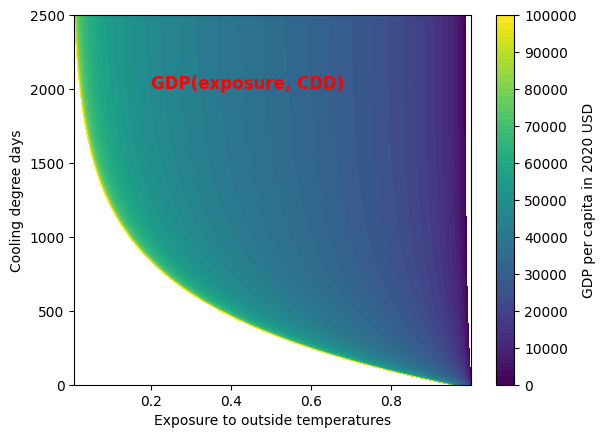

In [19]:
# Make contour plot of GDP as a function of penetration of air conditioning and cooling degree days
plt.figure()
levels = np.linspace(0, 100000, 51)
plt.contourf(exposure(gdp_x,cdd_x), cdd_x, gdp_x, levels=levels)
plt.xlabel('Exposure to outside temperatures')
plt.ylabel('Cooling degree days')
plt.colorbar(label='GDP per capita in 2020 USD', ticks=np.linspace(0, 100000, 11))
# color bar range is 0 to 100000
plt.clim(0, 100000)
# Add label in red and bold
plt.text(0.2, 2000, 'GDP(exposure, CDD)', fontsize=12, color='red', fontweight='bold')


Text(0.1, 80000, 'CDD(exposure, GDP)')

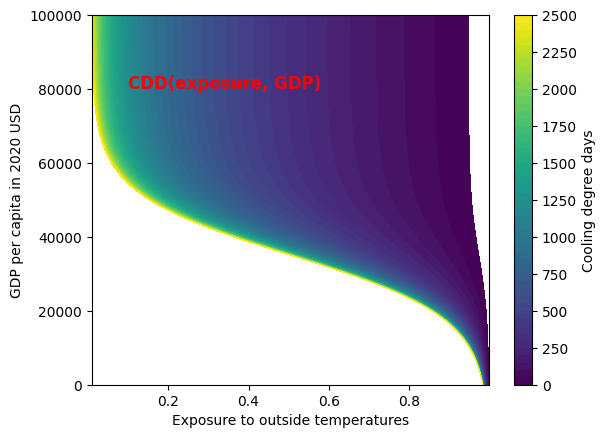

In [8]:
# Make contour plot of cooling degree days as a function of exposure and GDP
plt.figure()
levels = np.linspace(0, 2500, 51)
plt.contourf(exposure(gdp_x,cdd_x), gdp_x, cdd_x, levels=levels)
plt.xlabel('Exposure to outside temperatures')
plt.ylabel('GDP per capita in 2020 USD')
plt.colorbar(label='Cooling degree days', ticks=np.linspace(0, 2500, 11))
# color bar range is 0 to 2500
plt.clim(0, 2500)
# Add label in red and bold
plt.text(0.1, 80000, 'CDD(exposure, GDP)', fontsize=12, color='red', fontweight='bold')

Text(10000, 2000, 'd exposure / d GDP')

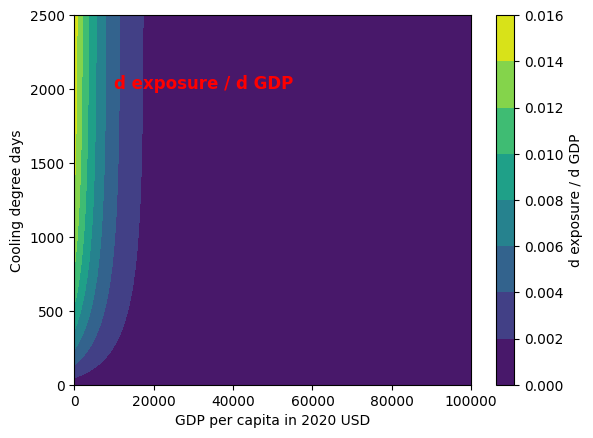

In [17]:
# Compute derivative of exposure with respect to GDP
def d_exposure_d_gdp(gdp, cdd):
    return (1.-0.949*np.exp(-0.00187*cdd)) * (np.exp(4.152)*np.exp(-0.237*infl_factor/1000)*np.exp(-0.237*infl_factor*gdp/1000)) * (1./(np.exp(4.152)+np.exp(-0.237*infl_factor*gdp/1000))**2)

# Make contour plot of d_exposure_d_gdp as a function of exposure and GDP
plt.figure()
plt.contourf(gdp_x, cdd_x, d_exposure_d_gdp(gdp_x, cdd_x))
plt.xlabel('GDP per capita in 2020 USD')
plt.ylabel('Cooling degree days')
plt.colorbar(label='d exposure / d GDP')
# Add label in red and bold
plt.text(10000, 2000, 'd exposure / d GDP', fontsize=12, color='red', fontweight='bold')


Text(10000, 2000, 'd exposure / d CDD')

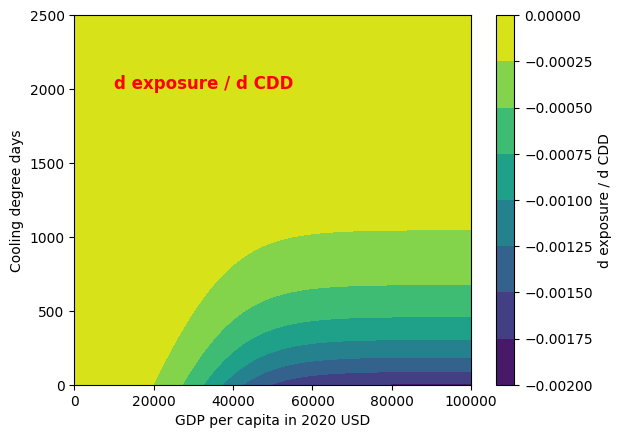

In [15]:
# Compute derivative of exposure with respect to CDD
def d_exposure_d_cdd(gdp, cdd):
    return (-0.949*0.00187*np.exp(-0.00187*cdd))*(1/(1+np.exp(4.152)*np.exp(-0.237*infl_factor*gdp/1000)))

# Make contour plot of d_exposure_d_cdd as a function of exposure and GDP
plt.figure()
plt.contourf(gdp_x, cdd_x, d_exposure_d_cdd(gdp_x, cdd_x))
plt.xlabel('GDP per capita in 2020 USD')
plt.ylabel('Cooling degree days')
plt.colorbar(label='d exposure / d CDD')

# Add label in red and bold
plt.text(10000, 2000, 'd exposure / d CDD', fontsize=12, color='red', fontweight='bold')